<a href="https://colab.research.google.com/github/bundickm/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt

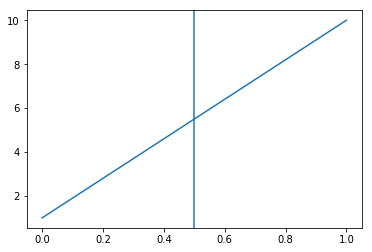

In [2]:
plt.plot([1,10]);
plt.axvline(x=.5);

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Each input has multiple outputs

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Answer: Relation 2, because each unique value of `x` has only one `y` value associated with it.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Input Dimensionality: m = 3, n = 4

Output Dimensionality: m = 3, n = 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

\begin{align}
m(𝑥_1,𝑥_2)=(x_1,x_2, x_1^2+x_2^2)
\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = x_1\begin{bmatrix} 1 \\-1 \\  \end{bmatrix} + x_2\begin{bmatrix} 3 \\2 \\  \end{bmatrix}
\\
T=\begin{bmatrix}1 & 3 \\ -1 & 2 \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = x_1\begin{bmatrix}4 \\ -1 \\5\end{bmatrix} + x_2\begin{bmatrix}1 \\ 2 \\1\end{bmatrix} + x_3\begin{bmatrix}2 \\ 3 \\-2\end{bmatrix}
\\
T=\begin{bmatrix}4 & 1 & 2 \\-1 & 2 & 3 \\ 5 & 1 & -2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

$$
p(\begin{bmatrix}2 \\ 3 \end{bmatrix}) = \begin{bmatrix} 2 + 3(3) \\2(3) - 2 \\  \end{bmatrix} = \begin{bmatrix} 11 \\4 \\  \end{bmatrix} = \begin{bmatrix}1 & 3 \\ -1 & 2 \end{bmatrix}\begin{bmatrix}2 \\ 3 \end{bmatrix} = \begin{bmatrix} 1(2) + 3(3) \\-1(2) + 2(3) \\  \end{bmatrix}
$$

$$
q(\begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix}) = \begin{bmatrix} 4(1) + 2 + 2(3) \\2(2) - 1 + 3(3) \\ 5(1) - 2(3) + 2  \end{bmatrix} = \begin{bmatrix} 12 \\12 \\ 1  \end{bmatrix} = \begin{bmatrix}4 & 1 & 2 \\-1 & 2 & 3 \\ 5 & 1 & -2  \end{bmatrix}\begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix} = \begin{bmatrix}4(1)+1(2)+2(3) \\ -1(1)+2(2)+3(3) \\ 5(1)+1(2)-2(3)\end{bmatrix}
$$

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.
Eigenvectors of a transformation  are vectors that retain their orientation  after being transformed. Eigenvalues are the scalars that represent how the eignenvectors were scaled by the transformation.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?
1.   Sparsity
2.   Computational load



## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?
5 times as many observations as you have features

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import pandas as pd
from numpy.linalg import eig

In [4]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
#Separate into label and target
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [12]:
X.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [11]:
#center the columns
centered_X = X-X.mean()
centered_X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.446,-2.358667,-0.998667


In [15]:
centered_X.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

In [20]:
#divide by standard deviation
Z = centered_X/centered_X.std()
Z.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593


In [22]:
#find the variance-covariance matrix
cov_matrix = Z.cov()
cov_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [27]:
e_values, e_vectors = eig(cov_matrix)
print('Eigenvalues:',e_values)
print()
print('Eigenvectors:\n',e_vectors)

Eigenvalues: [2.91081808 0.92122093 0.14735328 0.02060771]

Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [51]:
projected = pd.DataFrame(e_vectors.T.dot(centered_X.T)).T
projected = projected.rename(columns={0:'sepal_length',1:'sepal_width',2:'petal_length',3:'petal_width'})
projected.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,-2.441594,-0.020957,-0.321372,1.116693


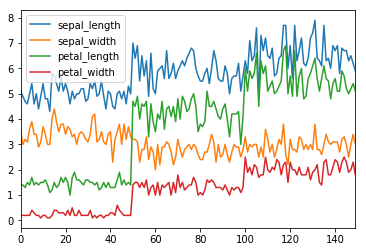

In [55]:
X.plot();

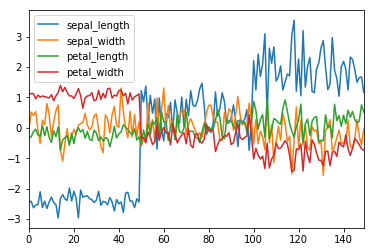

In [54]:
projected.plot();

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)